In [1]:
from skimage import io, color
from skimage.morphology import binary_closing, binary_opening
from skimage.morphology import disk
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure, img_as_ubyte
from skimage.color import label2rgb, gray2rgb
import pydicom as dicom
from scipy.stats import norm
from scipy.spatial import distance
import os
import pandas as pd
import seaborn as sns
from scipy.stats import lognorm
import statsmodels.api as sm
from scipy.stats import shapiro
from functools import reduce
from tqdm import tqdm
import math

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from collections import Counter
import pandas as pd
import seaborn as sns
from LDA import LDA
# sns.set_style("white")

In [3]:
def merge_df(df1, df2):
    return pd.merge(df1, df2, left_index=True, right_index=True)

def merge_dfs(dfs):
    return reduce(merge_df, dfs)

In [4]:
in_dir = 'data/'
in_file = 'ex6_ImagData2Load.mat'
data = sio.loadmat(in_dir + in_file)
ImgT1 = data['ImgT1']
ImgT2 = data['ImgT2']
ROI_GM = data['ROI_GM']
ROI_WM = data['ROI_WM']

In [5]:
# Counter(ImgT1.flatten())
# Counter(ImgT2.flatten())

stat_data_ImgT1 = ImgT1[ImgT1 > 10]
stat_data_ImgT2 = ImgT2[ImgT2 > 10]


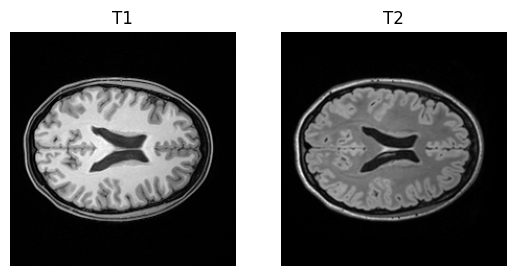

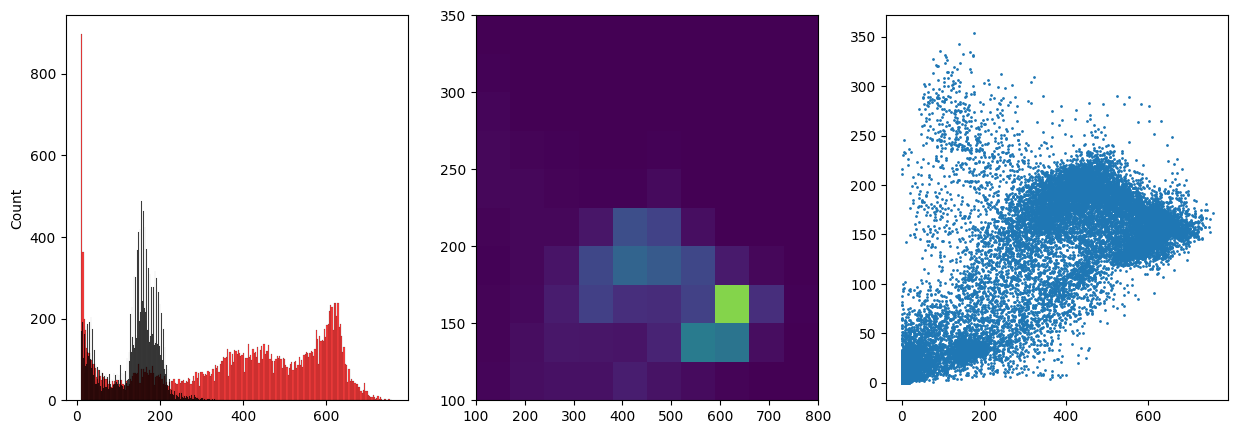

In [6]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(ImgT1, cmap='gray')
ax[0].set_title('T1')
ax[0].axis('off')

ax[1].imshow(ImgT2, cmap='gray')
ax[1].set_title('T2')
ax[1].axis('off')
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(stat_data_ImgT1, bins = 256, color='red', ax=ax[0])
sns.histplot(stat_data_ImgT2, bins = 256, color='black', ax=ax[0])

ax[1].hist2d(ImgT1.ravel(), ImgT2.ravel(), vmax=3000, range=([[100, 800], [100, 350]]))

ax[2].scatter(ImgT1.ravel(), ImgT2.ravel(), s=1)
plt.show()



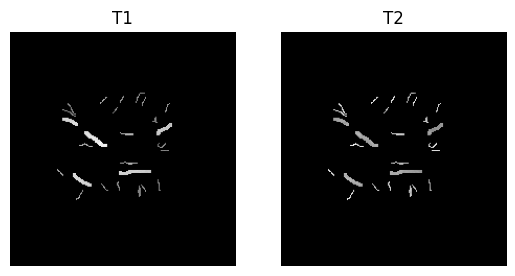

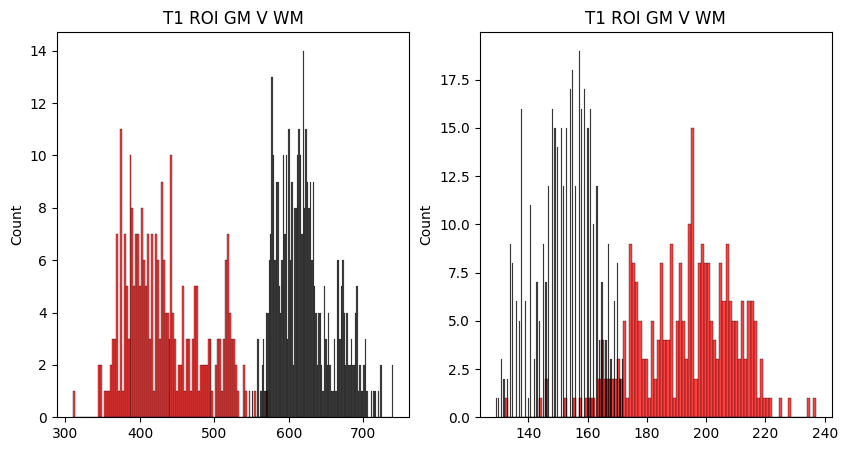

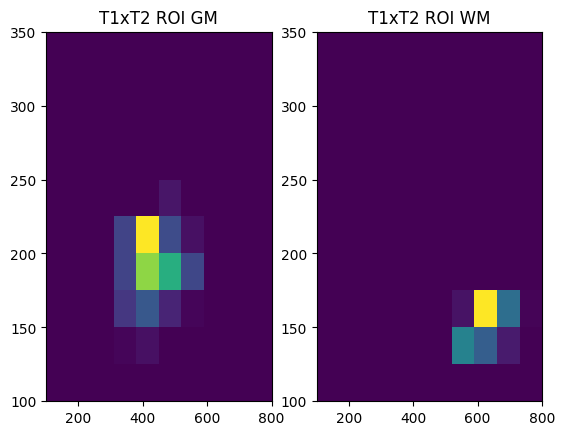

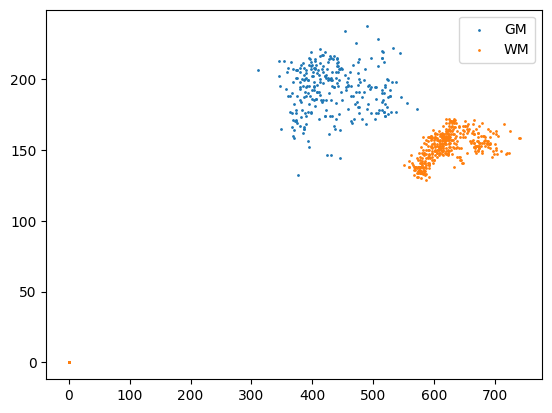

In [7]:
ImgT1_ROI = np.zeros(ImgT1.shape)
ImgT2_ROI = np.zeros(ImgT2.shape)

# Keep only the pixels of the mask

ImgT1_ROI[ROI_GM == 1] = ImgT1[ROI_GM == 1]

ImgT1_ROI[ROI_WM == 1] = ImgT1[ROI_WM == 1]

ImgT2_ROI[ROI_GM == 1] = ImgT2[ROI_GM == 1]

ImgT2_ROI[ROI_WM == 1] = ImgT2[ROI_WM == 1]

# Display the image
fig, ax = plt.subplots(1, 2)
ax[0].imshow(ImgT1_ROI, cmap='gray')
ax[0].set_title('T1')
ax[0].axis('off')

ax[1].imshow(ImgT2_ROI, cmap='gray')
ax[1].set_title('T2')
ax[1].axis('off')

img_data_T1_ROI_GM = np.zeros(ImgT1.shape)
img_data_T1_ROI_WM = np.zeros(ImgT1.shape)
img_data_T2_ROI_GM = np.zeros(ImgT2.shape)
img_data_T2_ROI_WM = np.zeros(ImgT2.shape)

img_data_T1_ROI_GM[ROI_GM == 1] = ImgT1[ROI_GM == 1]
stat_data_T1_ROI_GM = img_data_T1_ROI_GM[img_data_T1_ROI_GM > 10]

img_data_T1_ROI_WM[ROI_WM == 1] = ImgT1[ROI_WM == 1]
stat_data_T1_ROI_WM = img_data_T1_ROI_WM[img_data_T1_ROI_WM > 10]

img_data_T2_ROI_GM[ROI_GM == 1] = ImgT2[ROI_GM == 1]
stat_data_T2_ROI_GM = img_data_T2_ROI_GM[img_data_T2_ROI_GM > 10]

img_data_T2_ROI_WM[ROI_WM == 1] = ImgT2[ROI_WM == 1]
stat_data_T2_ROI_WM = img_data_T2_ROI_WM[img_data_T2_ROI_WM > 10]

# fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# ax[0, 0].imshow(img_data_T1_ROI_GM, cmap='gray')
# ax[0, 0].set_title('T1 ROI GM')
# ax[0, 0].axis('off')

# ax[0, 1].imshow(img_data_T1_ROI_WM, cmap='gray')
# ax[0, 1].set_title('T1 ROI WM')
# ax[0, 1].axis('off')

# ax[1, 0].imshow(img_data_T2_ROI_GM, cmap='gray')
# ax[1, 0].set_title('T2 ROI GM')
# ax[1, 0].axis('off')

# ax[1, 1].imshow(img_data_T2_ROI_WM, cmap='gray')
# ax[1, 1].set_title('T2 ROI WM')
# ax[1, 1].axis('off')


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(stat_data_T1_ROI_GM, bins = 100, color='red', ax=ax[0])
sns.histplot(stat_data_T1_ROI_WM, bins = 100, color='black', ax=ax[0])
sns.histplot(stat_data_T2_ROI_GM, bins = 100, color='red', ax=ax[1])
sns.histplot(stat_data_T2_ROI_WM, bins = 100, color='black', ax=ax[1])

ax[0].set_title('T1 ROI GM V WM')
ax[1].set_title('T1 ROI GM V WM')
plt.show()

fig,ax = plt.subplots(1, 2)
ax[0].hist2d(img_data_T1_ROI_GM.ravel(), img_data_T2_ROI_GM.ravel(), range=([[100, 800], [100, 350]]))
ax[1].hist2d(img_data_T1_ROI_WM.ravel(), img_data_T2_ROI_WM.ravel(), range=([[100, 800], [100, 350]]))

ax[0].set_title('T1xT2 ROI GM')
ax[1].set_title('T1xT2 ROI WM')
plt.show()

plt.scatter(img_data_T1_ROI_GM.ravel(), img_data_T2_ROI_GM.ravel(), s=1)
plt.scatter(img_data_T1_ROI_WM.ravel(), img_data_T2_ROI_WM.ravel(), s=1)
plt.legend(['GM', 'WM'])
ax[0].set_title('T1xT2 ROI GM & WM')
plt.show()

,T1 ROI GM,T1 ROI WM,T2 ROI GM,T2 ROI WM
count,280.000000,399.000000,280.000000,399.000000
mean,433.075000,622.140351,192.857143,152.348371
std,51.733028,38.028227,16.853606,9.845359
min,310.000000,550.000000,132.000000,129.000000
25%,392.000000,592.000000,180.750000,146.000000
50%,424.000000,617.000000,195.000000,153.000000
75%,472.250000,643.500000,206.000000,159.000000
max,572.000000,740.000000,237.000000,172.000000


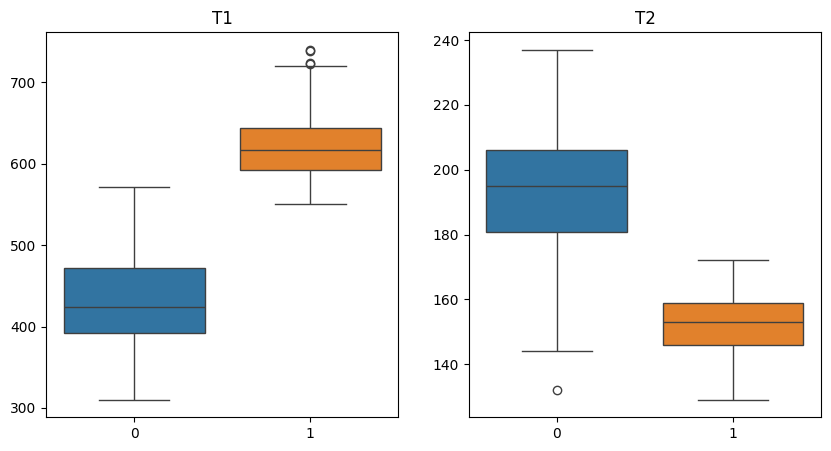

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=[stat_data_T1_ROI_GM, stat_data_T1_ROI_WM], ax=ax[0])
sns.boxplot(data=[stat_data_T2_ROI_GM, stat_data_T2_ROI_WM], ax=ax[1])

ax[0].set_title('T1')
ax[1].set_title('T2')
names =  ['T1 ROI GM', 'T1 ROI WM', 'T2 ROI GM', 'T2 ROI WM']
stat_array = [stat_data_T1_ROI_GM, stat_data_T1_ROI_WM, stat_data_T2_ROI_GM, stat_data_T2_ROI_WM]
merge_dfs([pd.DataFrame(stat, columns=[name]).describe() for stat, name in zip(stat_array, names)])

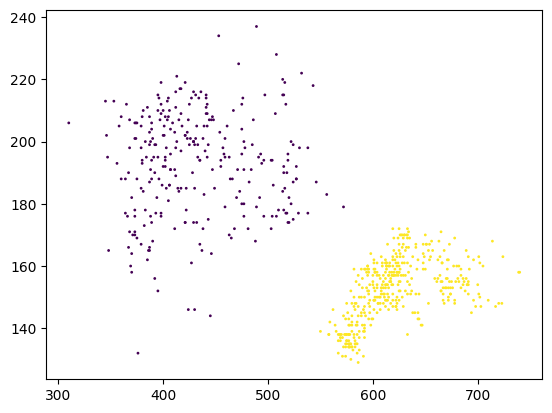

In [10]:
qC1 = np.argwhere(ROI_GM == 1)
qC2 = np.argwhere(ROI_WM == 1)

xC1_T1 = ImgT1[qC1[:, 0], qC1[:, 1]]
xC1_T2 = ImgT2[qC1[:, 0], qC1[:, 1]]

xC1 = np.stack((xC1_T1, xC1_T2), axis=1)

xC2_T1 = ImgT1[qC2[:, 0], qC2[:, 1]]
xC2_T2 = ImgT2[qC2[:, 0], qC2[:, 1]]

xC2 = np.stack((xC2_T1, xC2_T2), axis=1)

yC1 = np.zeros(xC1.shape[0])
yC2 = np.ones(xC2.shape[0])

X = np.concatenate((xC1, xC2), axis=0)
T = np.concatenate((yC1, yC2), axis=0)


plt.scatter(X[:, 0], X[:, 1], c=T, s=1)
plt.show()

W = LDA(X, T)

In [11]:
Xall= np.c_[ImgT1.ravel(), ImgT2.ravel()]
Y = np.c_[np.ones((len(Xall), 1)), Xall] @ W.T

In [12]:
Y

array([[-130.85086894, -137.28836962],
       [-130.85086894, -137.28836962],
       [-131.00987162, -137.56403634],
       ...,
       [-130.85086894, -137.28836962],
       [-130.85086894, -137.28836962],
       [-131.32787698, -138.11536977]])

In [13]:
PosteriorProb = np.clip(np.exp(Y) / np.sum(np.exp(Y),1)[:, np.newaxis], 0, 1)
PosteriorProb

array([[0.99840216, 0.00159784],
       [0.99840216, 0.00159784],
       [0.99857785, 0.00142215],
       ...,
       [0.99840216, 0.00159784],
       [0.99840216, 0.00159784],
       [0.99887348, 0.00112652]])

In [14]:
y_pred_C1 = np.where(PosteriorProb[:, 0] > 0.5)
y_pred_C2 = np.where(PosteriorProb[:, 1] > 0.5)

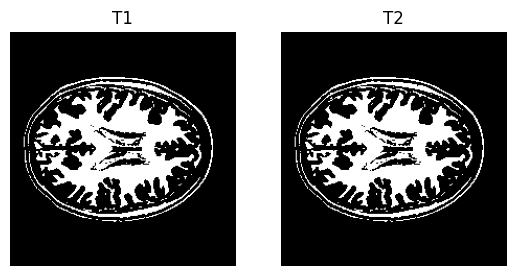

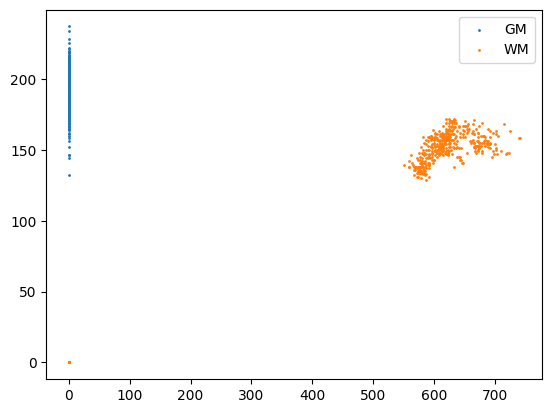

In [15]:
segmentation_T1 = np.zeros(ImgT1.shape).ravel()
segmentation_T1[y_pred_C1] = 0
segmentation_T1[y_pred_C2] = 1

segmentation_T2 = np.zeros(ImgT2.shape).ravel()
segmentation_T2[y_pred_C1] = 0
segmentation_T2[y_pred_C2] = 1

fig, ax = plt.subplots(1, 2)
ax[0].imshow(segmentation_T1.reshape(ImgT1.shape), cmap='gray')
ax[0].set_title('T1')
ax[0].axis('off')

ax[1].imshow(segmentation_T2.reshape(ImgT2.shape), cmap='gray')
ax[1].set_title('T2')
ax[1].axis('off')
plt.show()

plt.scatter(segmentation_T1, img_data_T2_ROI_GM.ravel(), s=1)
plt.scatter(img_data_T1_ROI_WM.ravel(), img_data_T2_ROI_WM.ravel(), s=1)
plt.legend(['GM', 'WM'])
ax[0].set_title('T1xT2 ROI GM & WM')
plt.show()